# Load dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import os
print(os.listdir("../input"))

['champs-scalar-coupling', 'morelure-mydata-train', 'morelure-mydata-test']


In [2]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
train_dtypes = {
    'scalar_coupling_constant': 'float32',
    "type" : "category",
    "id" : "int32",
    'molecule_name': 'category',
    'atom_index_0': 'int8',
    'atom_index_1': 'int8',
    'atom_0': 'int8',
    'atom_1': 'int8',
    "dist_x" : "float16",
    "dist_y" : "float16",
    "dist_z" : "float16",
    "dist_from_center_0" : "float16",
    "dist_from_center_1" : "float16",
    "atom_0_couples_count" : "int8",
    "atom_1_couples_count" : "int8",
    "max_distance_x" : "float16",
    "max_distance_y" : "float16",
    "dist_C_0_x" : "float16",
    "dist_C_1_x" : "float16",
    "dist_C_2_x" : "float16",
    "dist_C_3_x" : "float16",
    "dist_C_4_x" : "float16",
    "dist_H_0_x" : "float16",
    "dist_H_1_x" : "float16",
    "dist_H_2_x" : "float16",
    "dist_H_3_x" : "float16",
    "dist_H_4_x" : "float16",
    "dist_N_0_x" : "float16",
    "dist_O_0_x" : "float16",
    "dist_C_0_y" : "float16",
    "dist_C_1_y" : "float16",
    "dist_C_2_y" : "float16",
    "dist_C_3_y" : "float16",
    "dist_C_4_y" : "float16",
    "dist_H_0_y" : "float16",
    "dist_H_1_y" : "float16",
    "dist_H_2_y" : "float16",
    "dist_H_3_y" : "float16",
    "dist_H_4_y" : "float16",
    "dist_N_0_y" : "float16",
    "dist_O_0_y" : "float16",
    "cos_c0_c1" : "float16",
    "cos_f0_f1" : "float16",
    "cos_c0_f0" : "float16",
    "cos_c1_f1" : "float16",
    "cos_center0_center1" : "float64",
    "cos_c0" : "float16",
    "cos_c1" : "float16",
    "cos_f0" : "float16",
    "cos_f1" : "float16",
    "cos_center0" : "float16",
    "cos_center1" : "float64",
    "molecule_atom_index_0_dist_mean" : "float16",
    "molecule_atom_index_0_dist_std" : "float16",
    "molecule_atom_index_1_dist_mean" : "float16",
    "molecule_atom_index_1_dist_mean_diff" : "float16",
    "molecule_atom_index_1_dist_min" : "float16",
    "molecule_atom_index_1_dist_min_diff" : "float16",
    "molecule_type_dist_mean_diff" : "float16",
    "rc_C" : "float16",
    "mu" : "float16",
    "homo" : "float16",
    "gap" : "float16",
    "Cv" : "float16",
    "r2" : "float16",
    "freqs_min" : "float16",
    "freqs_max" : "float16",
    "freqs_mean" : "float16",
    "mulliken_min" : "float16",
    "mulliken_max" : "float16",
    "mulliken_atom_0" : "float16",
    "mulliken_atom_1" : "float16",
    "118" : "int8",
    "MinEStateIndex" : "float16",
    "MaxAbsEStateIndex" : "float16",
    "MinAbsEStateIndex" : "float16",
    "NumValenceElectrons" : "int8",
    "FpDensityMorgan1" : "float16",
    "FpDensityMorgan2" : "float16",
    "FpDensityMorgan3" : "float16",
    "BalabanJ" : "float16",
    "BertzCT" : "float16",
    "Chi0" : "float16",
    "Chi0v" : "float16",
    "Chi1" : "float16",
    "Chi1v" : "float16",
    "Chi4v" : "float16",
    "Ipc" : "float16",
    "Kappa1" : "float16",
    "Kappa2" : "float16",
    "Kappa3" : "float16",
    "LabuteASA" : "float16",
    "PEOE_VSA1" : "float16",
    "PEOE_VSA2" : "float16",
    "PEOE_VSA6" : "float16",
    "PEOE_VSA7" : "float16",
    "PEOE_VSA8" : "float16",
    "PEOE_VSA9" : "float16",
    "SMR_VSA4" : "float16",
    "SMR_VSA5" : "float16",
    "SMR_VSA6" : "float16",
    "SlogP_VSA2" : "float16",
    "SlogP_VSA4" : "float16",
    "SlogP_VSA5" : "float16",
    "TPSA" : "float16",
    "EState_VSA2" : "float16",
    "EState_VSA3" : "float16",
    "EState_VSA4" : "float16",
    "EState_VSA5" : "float16",
    "EState_VSA8" : "float16",
    "EState_VSA9" : "float16",
    "VSA_EState1" : "float16",
    "VSA_EState2" : "float16",
    "VSA_EState3" : "float16",
    "VSA_EState4" : "float16",
    "VSA_EState5" : "float16",
    "VSA_EState7" : "float16",
    "VSA_EState8" : "float16",
    "MolLogP" : "float16",
    "MolMR" : "float16",
    "link0" : "int16",
    "link1" : "int16",
    "linkN" : "int16",
    "E1" : "float16",
    "inv_distPR" : "float16",
    "inv_dist0E" : "float16",
    "inv_dist1E" : "float16",
    "inv_distPE" : "float16",
    "linkM0" : "float16",
    "linkM1" : "float16",
    "coulomb_C.x" : "float16",
    "coulomb_H.x" : "float16",
    "coulomb_O.x" : "float16",
    "vander_C.x" : "float16",
    "vander_H.x" : "float16",
    "vander_N.x" : "float16",
    "vander_O.x" : "float16",
    "coulomb_C.y" : "float16",
    "coulomb_H.y" : "float16",
    "coulomb_N.y" : "float16",
    "coulomb_O.y" : "float16",
    "vander_C.y" : "float16",
    "vander_H.y" : "float16",
    "vander_N.y" : "float16",
    "vander_O.y" : "float16",
    "distC0" : "float16",
    "distC1" : "float16",
    "adH1" : "float16",
    "adC1" : "float16",
    "adC2" : "float16",
    "adC3" : "float16",
    "adC4" : "float16",
    "NN" : "float16",
    "d_1_0" : "float16",
    "d_2_0" : "float16",
    "d_2_1" : "float16",
    "d_3_0" : "float16",
    "d_3_1" : "float16",
    "d_3_2" : "float16",
    "d_4_0" : "float16",
    "d_4_1" : "float16",
    "d_4_2" : "float16",
    "d_4_3" : "float16",
    "d_5_0" : "float16",
    "d_5_1" : "float16",
    "d_5_2" : "float16",
    "d_5_3" : "float16",
    "d_6_0" : "float16",
    "d_6_1" : "float16",
    "d_6_2" : "float16",
    "d_6_3" : "float16",
    "d_7_0" : "float16",
    "d_7_1" : "float16",
    "d_7_2" : "float16",
    "d_7_3" : "float16",
    "d_8_0" : "float16",
    "d_8_1" : "float16",
    "d_8_2" : "float16",
    "d_8_3" : "float16",
    "d_9_0" : "float16",
    "d_9_1" : "float16",
    "d_9_2" : "float16",
    "d_9_3" : "float16"}

In [4]:
train = pd.read_csv("../input/morelure-mydata-train/training_dataset2.csv", low_memory=True, dtype=train_dtypes)

In [5]:
train = reduce_mem_usage(train)

Mem. usage decreased to 1606.84 Mb (3.7% reduction)


In [6]:
train.head(5)

,type,id,molecule_name,atom_index_0,atom_index_1,atom_0,atom_1,dist_x,dist_y,dist_z,...,d_7_2,d_7_3,d_8_0,d_8_1,d_8_2,d_8_3,d_9_0,d_9_1,d_9_2,d_9_3
0,1JHC,0,dsgdb9nsd_000001,1,0,0,0,0.000220,1.192383,0.000036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2JHH,1,dsgdb9nsd_000001,1,2,0,1,1.019531,2.160156,0.000003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2JHH,2,dsgdb9nsd_000001,1,3,0,1,0.294922,2.111328,0.771484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2JHH,3,dsgdb9nsd_000001,1,4,0,1,0.276611,2.083984,0.817871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1JHC,4,dsgdb9nsd_000001,2,0,0,0,1.049805,0.142822,0.000060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#train = train.fillna(0)

In [8]:
test_dtypes = {
    #'scalar_coupling_constant': 'float32',
    "type" : "category",
    "id" : "int32",
    'molecule_name': 'category',
    'atom_index_0': 'int8',
    'atom_index_1': 'int8',
    'atom_0': 'int8',
    'atom_1': 'int8',
    "dist_x" : "float16",
    "dist_y" : "float16",
    "dist_z" : "float16",
    "dist_from_center_0" : "float16",
    "dist_from_center_1" : "float16",
    "atom_0_couples_count" : "int8",
    "atom_1_couples_count" : "int8",
    "max_distance_x" : "float16",
    "max_distance_y" : "float16",
    "dist_C_0_x" : "float16",
    "dist_C_1_x" : "float16",
    "dist_C_2_x" : "float16",
    "dist_C_3_x" : "float16",
    "dist_C_4_x" : "float16",
    "dist_H_0_x" : "float16",
    "dist_H_1_x" : "float16",
    "dist_H_2_x" : "float16",
    "dist_H_3_x" : "float16",
    "dist_H_4_x" : "float16",
    "dist_N_0_x" : "float16",
    "dist_O_0_x" : "float16",
    "dist_C_0_y" : "float16",
    "dist_C_1_y" : "float16",
    "dist_C_2_y" : "float16",
    "dist_C_3_y" : "float16",
    "dist_C_4_y" : "float16",
    "dist_H_0_y" : "float16",
    "dist_H_1_y" : "float16",
    "dist_H_2_y" : "float16",
    "dist_H_3_y" : "float16",
    "dist_H_4_y" : "float16",
    "dist_N_0_y" : "float16",
    "dist_O_0_y" : "float16",
    "cos_c0_c1" : "float16",
    "cos_f0_f1" : "float16",
    "cos_c0_f0" : "float16",
    "cos_c1_f1" : "float16",
    "cos_center0_center1" : "float64",
    "cos_c0" : "float16",
    "cos_c1" : "float16",
    "cos_f0" : "float16",
    "cos_f1" : "float16",
    "cos_center0" : "float16",
    "cos_center1" : "float64",
    "molecule_atom_index_0_dist_mean" : "float16",
    "molecule_atom_index_0_dist_std" : "float16",
    "molecule_atom_index_1_dist_mean" : "float16",
    "molecule_atom_index_1_dist_mean_diff" : "float16",
    "molecule_atom_index_1_dist_min" : "float16",
    "molecule_atom_index_1_dist_min_diff" : "float16",
    "molecule_type_dist_mean_diff" : "float16",
    "rc_C" : "float16",
    "mu" : "float16",
    "homo" : "float16",
    "gap" : "float16",
    "Cv" : "float16",
    "r2" : "float16",
    "freqs_min" : "float16",
    "freqs_max" : "float16",
    "freqs_mean" : "float16",
    "mulliken_min" : "float16",
    "mulliken_max" : "float16",
    "mulliken_atom_0" : "float16",
    "mulliken_atom_1" : "float16",
    "118" : "int8",
    "MinEStateIndex_x" : "float16",
    "MinEStateIndex_y" : "float16",
    "MaxAbsEStateIndex" : "float16",
    "MinAbsEStateIndex" : "float16",
    "NumValenceElectrons" : "int8",
    "FpDensityMorgan1" : "float16",
    "FpDensityMorgan2" : "float16",
    "FpDensityMorgan3" : "float16",
    "BalabanJ" : "float16",
    "BertzCT" : "float16",
    "Chi0" : "float16",
    "Chi0v" : "float16",
    "Chi1" : "float16",
    "Chi1v" : "float16",
    "Chi4v" : "float16",
    "Ipc" : "float16",
    "Kappa1" : "float16",
    "Kappa2" : "float16",
    "Kappa3" : "float16",
    "LabuteASA" : "float16",
    "PEOE_VSA1" : "float16",
    "PEOE_VSA2" : "float16",
    "PEOE_VSA6" : "float16",
    "PEOE_VSA7" : "float16",
    "PEOE_VSA8" : "float16",
    "PEOE_VSA9" : "float16",
    "SMR_VSA4" : "float16",
    "SMR_VSA5" : "float16",
    "SMR_VSA6" : "float16",
    "SlogP_VSA2" : "float16",
    "SlogP_VSA4" : "float16",
    "SlogP_VSA5" : "float16",
    "TPSA" : "float16",
    "EState_VSA2" : "float16",
    "EState_VSA3" : "float16",
    "EState_VSA4" : "float16",
    "EState_VSA5" : "float16",
    "EState_VSA8" : "float16",
    "EState_VSA9" : "float16",
    "VSA_EState1" : "float16",
    "VSA_EState2" : "float16",
    "VSA_EState3" : "float16",
    "VSA_EState4" : "float16",
    "VSA_EState5" : "float16",
    "VSA_EState7" : "float16",
    "VSA_EState8" : "float16",
    "MolLogP" : "float16",
    "MolMR" : "float16",
    "link0" : "int16",
    "link1" : "int16",
    "linkN" : "int16",
    "E1" : "float16",
    "inv_distPR" : "float16",
    "inv_dist0E" : "float16",
    "inv_dist1E" : "float16",
    "inv_distPE" : "float16",
    "linkM0" : "float16",
    "linkM1" : "float16",
    "coulomb_C.x" : "float16",
    "coulomb_H.x" : "float16",
    "coulomb_O.x" : "float16",
    "vander_C.x" : "float16",
    "vander_H.x" : "float16",
    "vander_N.x" : "float16",
    "vander_O.x" : "float16",
    "coulomb_C.y" : "float16",
    "coulomb_H.y" : "float16",
    "coulomb_N.y" : "float16",
    "coulomb_O.y" : "float16",
    "vander_C.y" : "float16",
    "vander_H.y" : "float16",
    "vander_N.y" : "float16",
    "vander_O.y" : "float16",
    "distC0" : "float16",
    "distC1" : "float16",
    "adH1" : "float16",
    "adC1" : "float16",
    "adC2" : "float16",
    "adC3" : "float16",
    "adC4" : "float16",
    "NN" : "float16",
    "d_1_0" : "float16",
    "d_2_0" : "float16",
    "d_2_1" : "float16",
    "d_3_0" : "float16",
    "d_3_1" : "float16",
    "d_3_2" : "float16",
    "d_4_0" : "float16",
    "d_4_1" : "float16",
    "d_4_2" : "float16",
    "d_4_3" : "float16",
    "d_5_0" : "float16",
    "d_5_1" : "float16",
    "d_5_2" : "float16",
    "d_5_3" : "float16",
    "d_6_0" : "float16",
    "d_6_1" : "float16",
    "d_6_2" : "float16",
    "d_6_3" : "float16",
    "d_7_0" : "float16",
    "d_7_1" : "float16",
    "d_7_2" : "float16",
    "d_7_3" : "float16",
    "d_8_0" : "float16",
    "d_8_1" : "float16",
    "d_8_2" : "float16",
    "d_8_3" : "float16",
    "d_9_0" : "float16",
    "d_9_1" : "float16",
    "d_9_2" : "float16",
    "d_9_3" : "float16"}

In [9]:
test = pd.read_csv("../input/morelure-mydata-test/test_dataset2.csv", dtype=test_dtypes)

In [10]:
sub = pd.read_csv("../input/champs-scalar-coupling/sample_submission.csv")

In [11]:
test = reduce_mem_usage(test)

Mem. usage decreased to 892.87 Mb (0.0% reduction)


In [12]:
test = test.drop(["MinEStateIndex_y"], axis=1)
test = test.rename(columns ={"MinEStateIndex_x":"MinEStateIndex"})
test.head(5)

,type,id,molecule_name,atom_index_0,atom_index_1,atom_0,atom_1,dist_x,dist_y,dist_z,...,d_7_2,d_7_3,d_8_0,d_8_1,d_8_2,d_8_3,d_9_0,d_9_1,d_9_2,d_9_3
0,2JHC,4658147,dsgdb9nsd_000004,2,0,0,0,5.117188,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1JHC,4658148,dsgdb9nsd_000004,2,1,0,0,1.128906,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3JHH,4658149,dsgdb9nsd_000004,2,3,0,1,11.046875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1JHC,4658150,dsgdb9nsd_000004,3,0,0,0,1.128906,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2JHC,4658151,dsgdb9nsd_000004,3,1,0,0,5.117188,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
import sys

print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_") and sys.getsizeof(eval(var_name)) > 10000: #over 10000 byte data pick up
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))


|            Variable Name|    Memory|
 ------------------------------------ 
|                      sub|  40088824|
|                     test| 934209118|
|                    train|1690418686|


# Prepare dataset  
## Encording

In [14]:
#Prepare dataset
# Label Encoding
#for f in ['atom_0', 'atom_1']:#,'type']:
#    lbl = LabelEncoder()
#    lbl.fit(list(train[f].values) + list(test[f].values))
#    train[f] = lbl.transform(list(train[f].values))
#    test[f] = lbl.transform(list(test[f].values))

#If folloing code add above for-loop "lbl.inverse_transform([1])[0]" will fail to re-labeling
lbl = LabelEncoder()
lbl.fit(list(train['type'].values) + list(test['type'].values))
train['type'] = lbl.transform(list(train['type'].values))
test['type'] = lbl.transform(list(test['type'].values))

## devide dataset for LightGBM model and define the model

In [15]:
import lightgbm as lgb
from sklearn.model_selection import GroupKFold,StratifiedKFold, KFold
from sklearn import metrics
import time
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 15
import gc
import warnings
warnings.filterwarnings("ignore")

In [16]:
def train_model_regression(X, X_test, y, params, folds, model_type='lgb', eval_metric='mae', columns=None, plot_feature_importance=False, model=None,
                               verbose=10000, early_stopping_rounds=200, n_estimators=50000):
    """
    A function to train a variety of regression models.
    Returns dictionary with oof predictions, test predictions, scores and, if necessary, feature importances.
    
    :params: X - training data, can be pd.DataFrame or np.ndarray (after normalizing)
    :params: X_test - test data, can be pd.DataFrame or np.ndarray (after normalizing)
    :params: y - target
    :params: folds - folds to split data
    :params: model_type - type of model to use
    :params: eval_metric - metric to use
    :params: columns - columns to use. If None - use all columns
    :params: plot_feature_importance - whether to plot feature importance of LGB
    :params: model - sklearn model, works only for "sklearn" model type
    
    """
    columns = X.columns if columns is None else columns
    X_test = X_test[columns]
    
    # to set up scoring parameters
    metrics_dict = {'mae': {'lgb_metric_name': 'mae',
                        'catboost_metric_name': 'MAE',
                        'sklearn_scoring_function': metrics.mean_absolute_error},
                    'group_mae': {'lgb_metric_name': 'mae',
                        'catboost_metric_name': 'MAE',
                        'scoring_function': group_mean_log_mae},
                    'mse': {'lgb_metric_name': 'mse',
                        'catboost_metric_name': 'MSE',
                        'sklearn_scoring_function': metrics.mean_squared_error}
                    }

    
    result_dict = {}
    
    # out-of-fold predictions on train data
    oof = np.zeros(len(X))
    
    # averaged predictions on train data
    prediction = np.zeros(len(X_test))
    
    # list of scores on folds
    scores = []
    feature_importance = pd.DataFrame()
    
    # split and train on folds
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        print(f'Fold {fold_n + 1} started at {time.ctime()}')
        if type(X) == np.ndarray:
            X_train, X_valid = X[columns][train_index], X[columns][valid_index]
            y_train, y_valid = y[train_index], y[valid_index]
        else:
            X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
            y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
            
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators = n_estimators, n_jobs = -1)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric=metrics_dict[eval_metric]['lgb_metric_name'],
                    verbose=verbose, early_stopping_rounds=early_stopping_rounds)
            
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train, feature_names=X.columns)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid, feature_names=X.columns)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=verbose, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid, feature_names=X.columns), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test, feature_names=X.columns), ntree_limit=model.best_ntree_limit)
        
        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            
            y_pred_valid = model.predict(X_valid).reshape(-1,)
            score = metrics_dict[eval_metric]['sklearn_scoring_function'](y_valid, y_pred_valid)
            print(f'Fold {fold_n}. {eval_metric}: {score:.4f}.')
            print('')
            
            y_pred = model.predict(X_test).reshape(-1,)
        
        if model_type == 'cat':
            model = CatBoostRegressor(iterations=20000,  eval_metric=metrics_dict[eval_metric]['catboost_metric_name'], **params,
                                      loss_function=metrics_dict[eval_metric]['catboost_metric_name'])
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        oof[valid_index] = y_pred_valid.reshape(-1,)
        if eval_metric != 'group_mae':
            scores.append(metrics_dict[eval_metric]['sklearn_scoring_function'](y_valid, y_pred_valid))
        else:
            scores.append(metrics_dict[eval_metric]['scoring_function'](y_valid, y_pred_valid, X_valid['type']))

        prediction += y_pred    
        
        if model_type == 'lgb' and plot_feature_importance:
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= folds.n_splits
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    result_dict['oof'] = oof
    result_dict['prediction'] = prediction
    result_dict['scores'] = scores
    
    if model_type == 'lgb':
        if plot_feature_importance:
            feature_importance["importance"] /= folds.n_splits
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
            
            result_dict['feature_importance'] = feature_importance
        
    return result_dict

In [17]:
def group_mean_log_mae(y_true, y_pred, types, floor=1e-9):
    """
    Fast metric computation for this competition: https://www.kaggle.com/c/champs-scalar-coupling
    Code is from this kernel: https://www.kaggle.com/uberkinder/efficient-metric
    """
    maes = (y_true-y_pred).abs().groupby(types).mean()
    return np.log(maes.map(lambda x: max(x, floor))).mean()

In [18]:
def del_cols(df, cols):
    del_cols_list_ = [l for l in cols if l in df]
    df = df.drop(del_cols_list_,axis=1)
    return df

y_train = train.scalar_coupling_constant
x_train = del_cols(train, ["molecule_name", "scalar_coupling_constant", "id"])
x_test = del_cols(test, ["molecule_name", "id"])
x_train.head(5)

,type,atom_index_0,atom_index_1,atom_0,atom_1,dist_x,dist_y,dist_z,dist_from_center_0,dist_from_center_1,...,d_7_2,d_7_3,d_8_0,d_8_1,d_8_2,d_8_3,d_9_0,d_9_1,d_9_2,d_9_3
0,0,1,0,0,0,0.000220417976379,1.192382812500,0.000036299228668,0.006702423095703,1.0859375000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1,2,0,1,1.019531250000000,2.160156250000,0.000002861022949,0.006702423095703,1.7792968750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,0,1,0.294921875000000,2.111328125000,0.771484375000000,0.006702423095703,1.7763671875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,4,0,1,0.276611328125000,2.083984375000,0.817871093750000,0.006702423095703,1.7773437500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,0,0,0,1.049804687500000,0.142822265625,0.000059723854065,1.779296875000000,1.0859375000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Build LightGBM model

In [19]:
#Set hyper parameters
params = {'num_leaves': 200,
          #'min_child_samples': 32,
          'objective': 'regression',  #I will check it.
          'max_depth': 12,
          'learning_rate': 0.08,
          "boosting_type": "gbdt",
          "max_bin":128, 
          "min_data_in_leaf":20,
          "subsample_freq": 1,
          "subsample": 1.0,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          #'reg_alpha': 0.8,
          #'reg_lambda': 0.2,
          #'colsample_bytree': 0.6
          'lambda_l1': 0.8,
          'lambda_l2': 0.2,
          'feature_fraction': 0.6,
         }

In [20]:
n_fold = 3
folds = KFold(n_splits=n_fold, shuffle=True, random_state=11)

In [21]:
#We use different numbers of iterations for different type, after running the label encoder
###Iters###    [1JHC, 1JHN, 2JHC, 2JHH, 2JHN, 3JHC, 3JHH, 3JHN]
n_estimators = [8000, 2000, 8000, 2500, 2000, 6000, 5000, 2500]

In [22]:
train_type = pd.DataFrame({"type":train["type"]})
test_type = pd.DataFrame({"type":test["type"]})

In [23]:
del train
del test

In [24]:
X_short = pd.DataFrame({'ind': list(train_type.index), 
                        'type': train_type['type'].values,
                        'oof': [0] * len(train_type), 
                        'target': y_train.values})
X_short_test = pd.DataFrame({'ind': list(test_type.index), 
                             'type': test_type['type'].values, 
                             'prediction': [0] * len(test_type)})


Training of type 0: 1JHC.
Fold 1 started at Sun Aug 25 10:56:24 2019
Training until validation scores don't improve for 200 rounds.
[500]	training's l1: 0.646884	valid_1's l1: 0.804782
[1000]	training's l1: 0.481047	valid_1's l1: 0.723788
[1500]	training's l1: 0.383929	valid_1's l1: 0.687035
[2000]	training's l1: 0.315754	valid_1's l1: 0.665426
[2500]	training's l1: 0.264769	valid_1's l1: 0.651193
[3000]	training's l1: 0.225101	valid_1's l1: 0.64138
[3500]	training's l1: 0.193522	valid_1's l1: 0.634755
[4000]	training's l1: 0.16775	valid_1's l1: 0.629617
[4500]	training's l1: 0.146152	valid_1's l1: 0.625681
[5000]	training's l1: 0.128216	valid_1's l1: 0.622591
[5500]	training's l1: 0.112916	valid_1's l1: 0.620036
[6000]	training's l1: 0.100037	valid_1's l1: 0.618051
[6500]	training's l1: 0.0886692	valid_1's l1: 0.616258
[7000]	training's l1: 0.0792029	valid_1's l1: 0.614878
[7500]	training's l1: 0.0711119	valid_1's l1: 0.613792
[8000]	training's l1: 0.0639429	valid_1's l1: 0.612844
Di

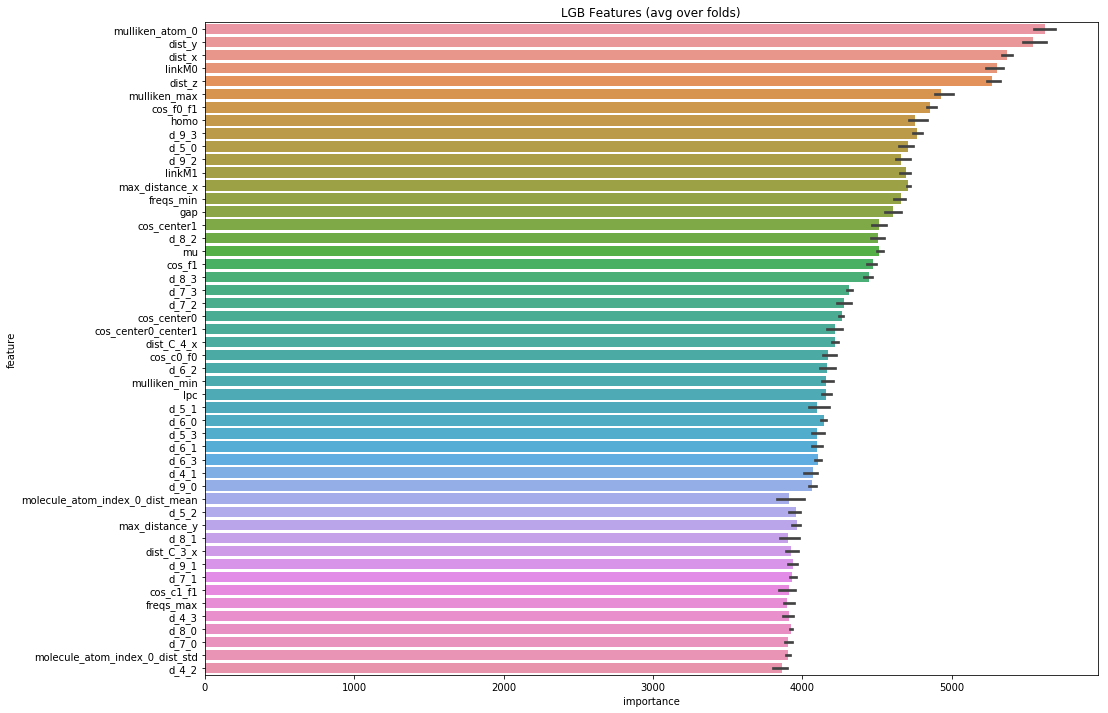

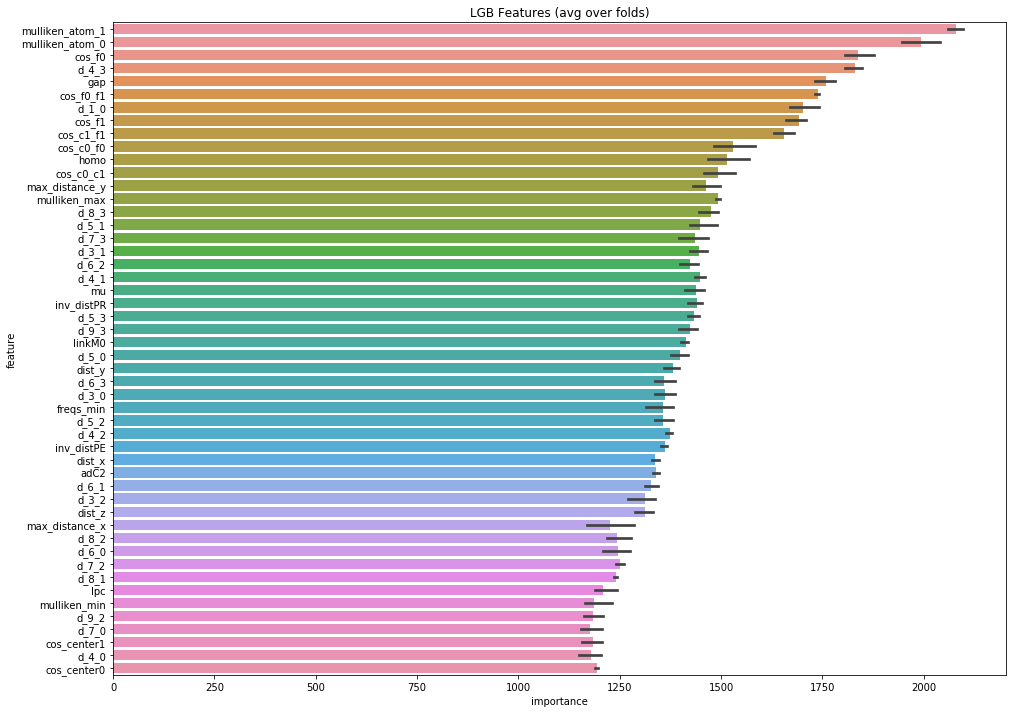

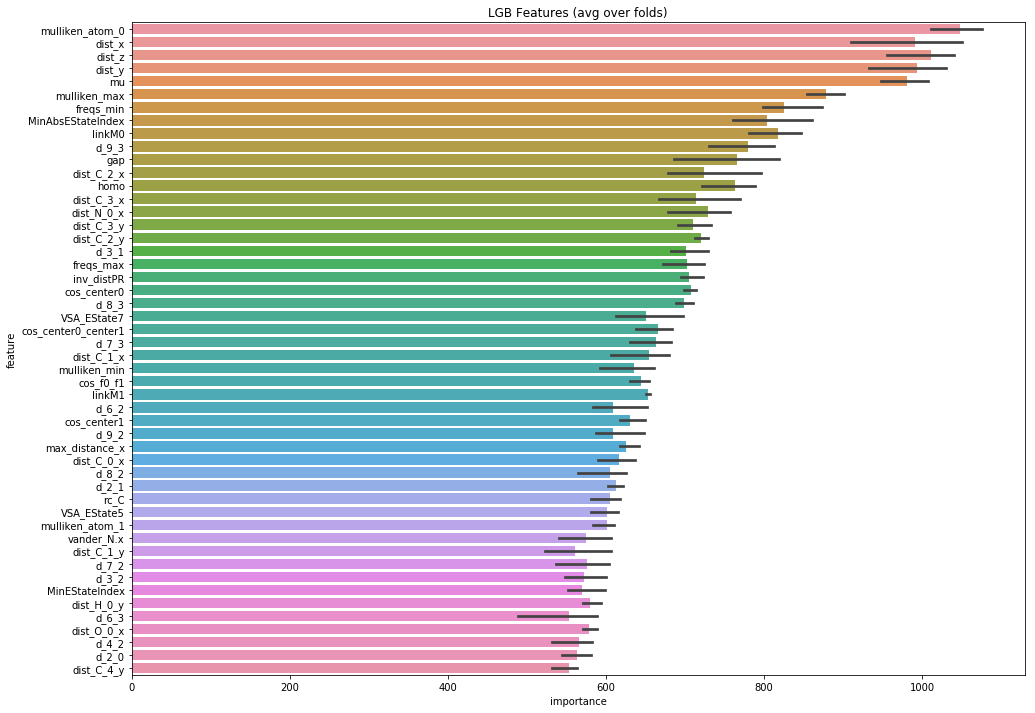

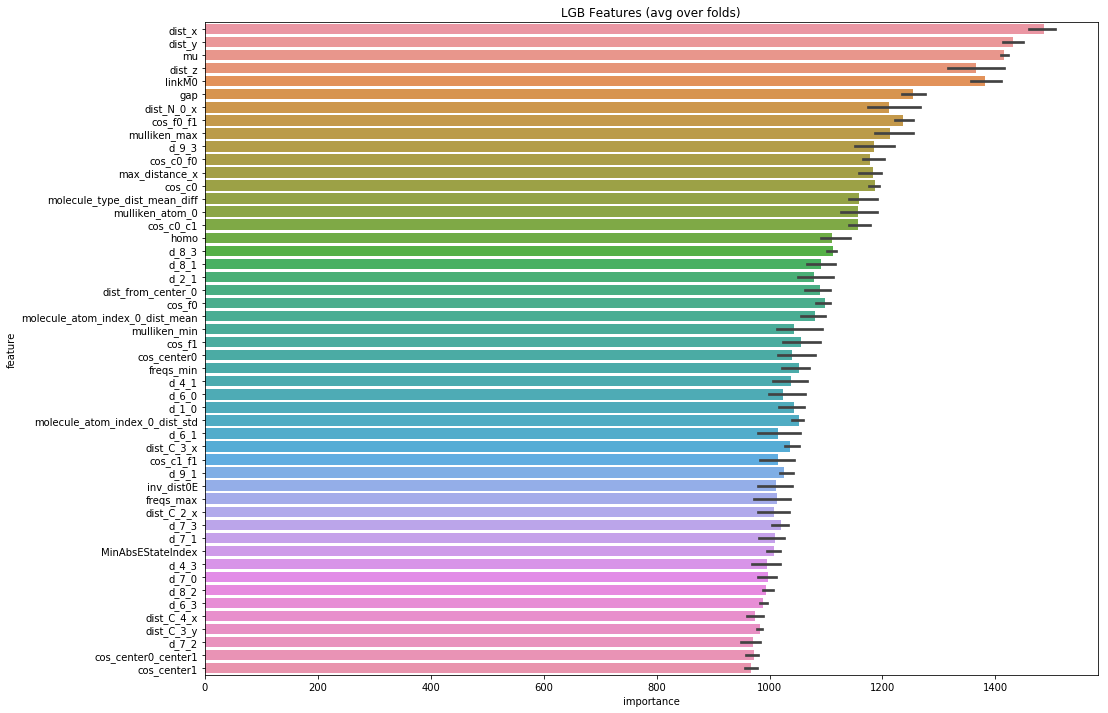

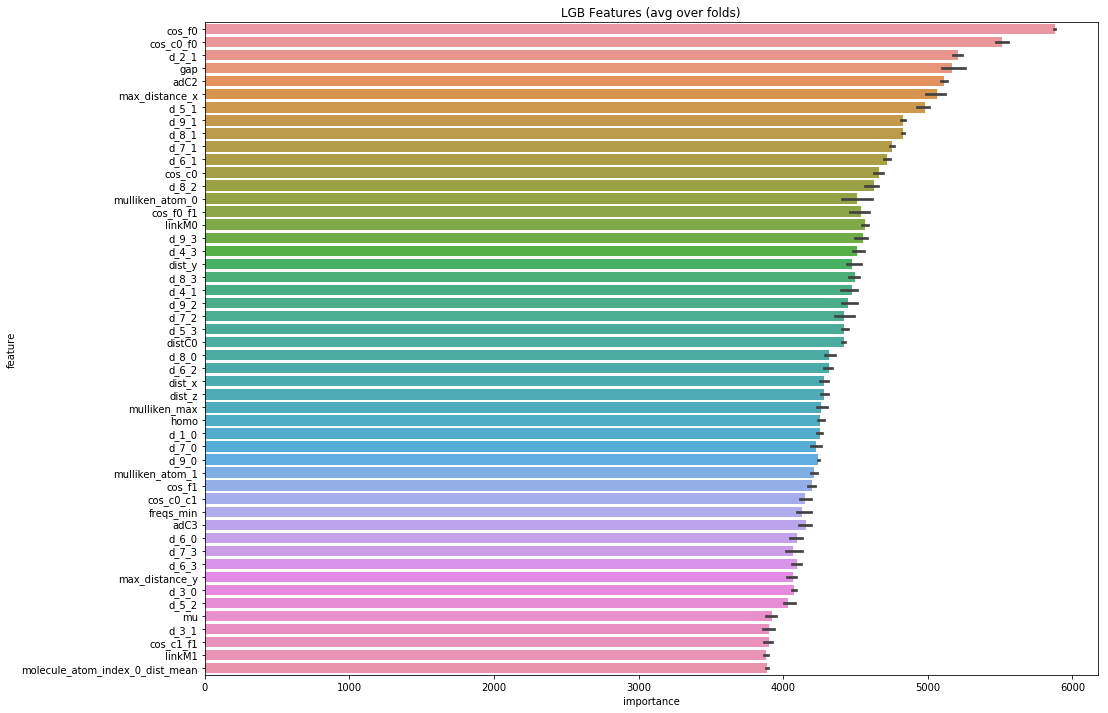

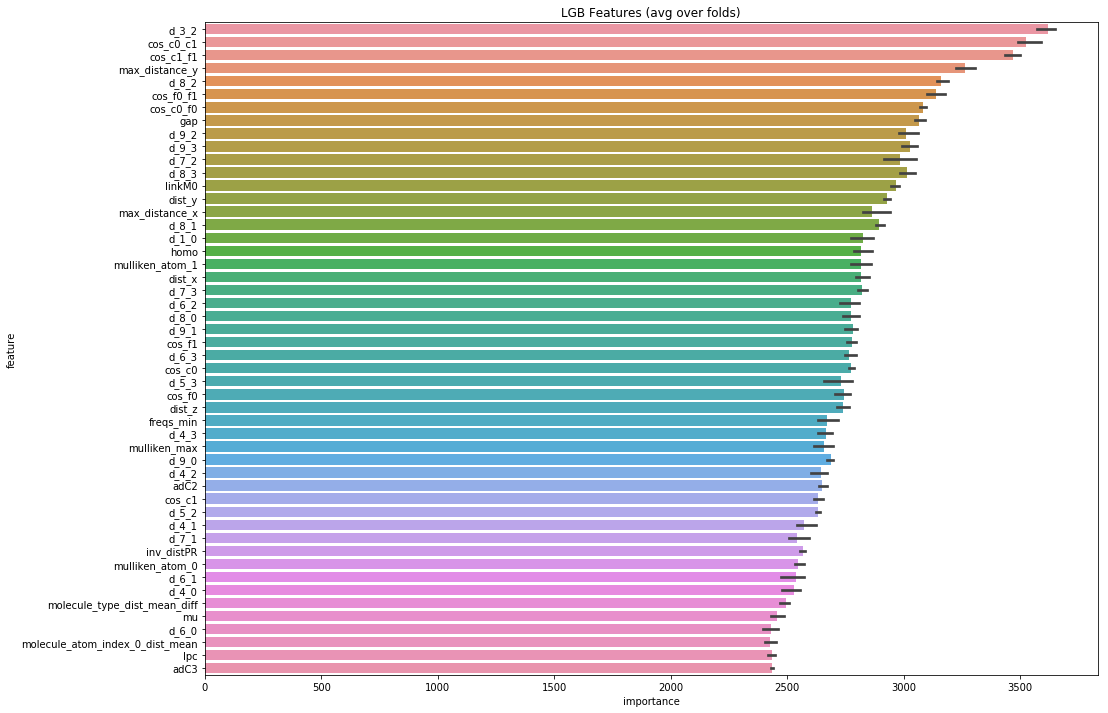

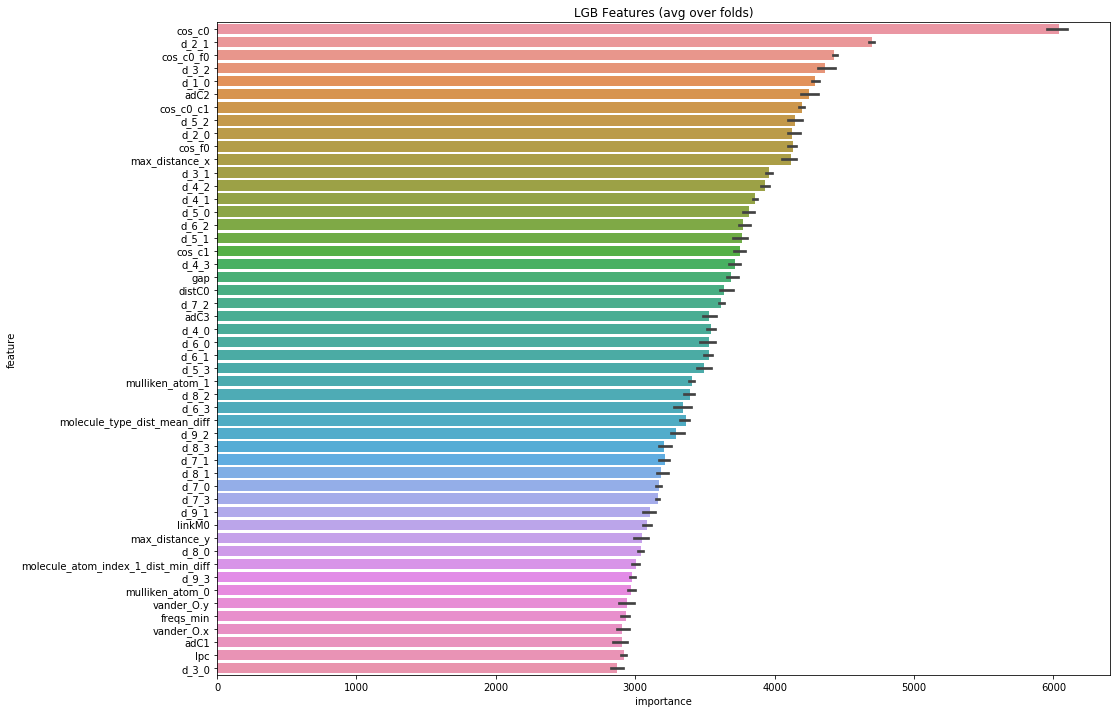

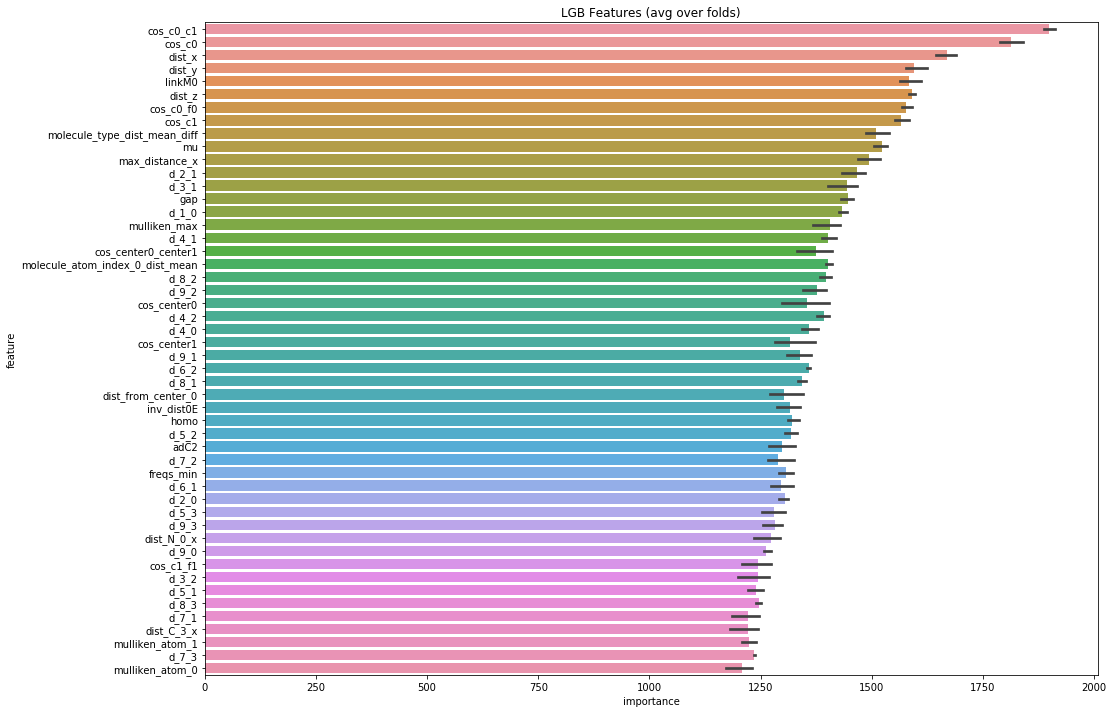

In [25]:
#Run
CV_score = 0

for t in train_type['type'].unique():
    type_ = lbl.inverse_transform([t])[0]
    print(f'\nTraining of type {t}: {type_}.')
    index_type = (train_type['type'] == t)
    index_type_test = (test_type['type'] == t)
    
    X_t = x_train.loc[index_type].copy()
    X_test_t = x_test.loc[index_type_test].copy()
    y_t = y_train[index_type]

    
    result_dict_lgb = train_model_regression(X=X_t, X_test=X_test_t, 
                                              y=y_t, params=params, 
                                              folds=folds, 
                                              model_type='lgb', 
                                              eval_metric='mae', 
                                              plot_feature_importance=True,
                                              verbose=500, early_stopping_rounds=200, 
                                              n_estimators=n_estimators[t])
    del X_t, X_test_t
    gc.collect()
    
    X_short.loc[X_short['type'] == t, 'oof'] = result_dict_lgb['oof']
    X_short_test.loc[X_short_test['type'] == t, 'prediction'] = result_dict_lgb['prediction']
    
    ## manually computing the cv score
    CV_score += np.log(np.array(result_dict_lgb['scores']).mean())/8 # total 8 types

In [26]:
sub['scalar_coupling_constant'] = X_short_test['prediction']
#today = str(datetime.date.today())
sub.to_csv('LightGBM_190824.csv', index=False)

In [27]:
plot_data = y_train #maybe fail
plot_data.index.name = 'id'
plot_data['yhat'] = X_short['oof']
plot_data['type'] = lbl.inverse_transform(X_short['type'])

def plot_oof_preds(ctype, llim, ulim):
        plt.figure(figsize=(6,6))
        sns.scatterplot(x='scalar_coupling_constant',y='yhat',
                        data=plot_data.loc[plot_data['type']==ctype,
                        ['scalar_coupling_constant', 'yhat']]);
        plt.xlim((llim, ulim))
        plt.ylim((llim, ulim))
        plt.plot([llim, ulim], [llim, ulim])
        plt.xlabel('scalar_coupling_constant')
        plt.ylabel('predicted')
        plt.title(f'{ctype}', fontsize=18)
        plt.show()

plot_oof_preds('1JHC', 0, 250)
plot_oof_preds('1JHN', 0, 100)
plot_oof_preds('2JHC', -50, 50)
plot_oof_preds('2JHH', -50, 50)
plot_oof_preds('2JHN', -25, 25)
plot_oof_preds('3JHC', -25, 100)
plot_oof_preds('3JHH', -20, 20)
plot_oof_preds('3JHN', -15, 15)

IndexingError: Too many indexers

<Figure size 432x432 with 0 Axes>